In [1]:
import os
import math
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

<strong>There are 2 datasets:</strong><br/>
<ol>
<li>Training data set,</li>
<li>Test data set.</li>
</ol>
Each of these data sets are .csv files. <br/>
Each dataset has 785 columns with a variable number of rows.
We shall use the pandas package to read these files. The results are numpy arrays.
The training data set has 60,000 test cases and the test data set has 10,000 cases.

We shall use the pandas package to read these files. The results are numpy arrays.

In [2]:
root_dir = "C:\\Apps\\Projects\\ml\\data\\mnist\\"
training_filename = root_dir + "mnist_train.csv"
# Use pandas to read csv file
tmp=pd.read_csv(training_filename, sep=',', header=None)
# Use df.loc to access a group of rows and columns
# Use .values to return the numpy representation.

# Read the training data set
x_train, y_train=tmp.loc[:,1:tmp.shape[1]].values, tmp.loc[:,0].values

# Read the test data set
test_filename = root_dir + "mnist_test.csv"
tmp=pd.read_csv(test_filename, sep=',', header=None)
x_test, y_test=tmp.loc[:,1:tmp.shape[1]].values, tmp.loc[:,0].values
tmp=[]

In [3]:
# Just checking the array dimensions
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [4]:
print(x_train[0:5,:])
print(y_train[0:5])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[5 0 4 1 9]


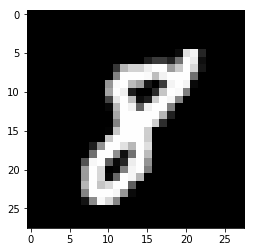

The digit for index 17 is 8


In [5]:
index=17
curr_image=np.resize(x_train[index, :], (28, 28))
plt.imshow(curr_image, cmap='Greys_r')
plt.show()
print("The digit for index {0} is {1}".format(index, y_train[index]))

In [24]:
logs_path = 'logging/' # logging path
batch_size = 100 # batch size while performing training 
learning_rate = 0.003 # Learning rate 
training_epochs = 20 # training epoch
display_epoch = 1
N1 = 300
N2 = 300
N3 = 100
N4 = 60
N5 = 10

In [ ]:
# x = tf.placeholder(dtype=tf.int32, shape=[], name="foo1")       shape takes a single scalar value directly.
# y = tf.placeholder(dtype=tf.int32, shape=[None], name="foo2")   shape takes a 1-dim array
# z = tf.placeholder(dtype=tf.int32, shape=None, name="foo3")     shape can take in any value 

In [7]:
X = tf.placeholder(tf.float32, shape=(None, 784), name='X_Vector')
XX = tf.reshape(X, [-1, 784])
Y_  = tf.placeholder(tf.float32, shape=(None, 10), name='Y_Vector')
lr = tf.placeholder(tf.float32)

In [8]:
print(XX.shape)
print(Y_.shape)

(?, 784)
(?, 10)


In [ ]:
# A variable maintains state in the graph across calls to run()
# Create a variable.
# w = tf.Variable(<initial-value>, name=<optional-name>, shape=<optional-shape>)

# Truncated normal Outputs random values from a truncated normal distribution.
#
# tf.random.truncated_normal(shape, mean=0.0, stddev=1.0, dtype=tf.dtypes.float32, seed=None, name=None)


In [9]:
# Create the weights vector
W1 = tf.Variable(tf.truncated_normal([784, N1], stddev=0.1))
# Create the bias term
B1 = tf.Variable(tf.zeros([N1])) 

In [10]:
Y1 = tf.nn.sigmoid(tf.matmul(XX, W1) + B1)

In [11]:
W2 = tf.Variable(tf.truncated_normal([N1, N2], stddev=0.1)) 
B2 = tf.Variable(tf.ones([N2])) 

In [12]:
Y2 = tf.nn.sigmoid(tf.matmul(Y1, W2) + B2)

In [13]:
W3 = tf.Variable(tf.truncated_normal([N2, N3], stddev=0.1))
B3 = tf.Variable(tf.ones([N3]))

In [14]:
Y3 = tf.nn.sigmoid(tf.matmul(Y2, W3) + B3) 

In [15]:
W4 = tf.Variable(tf.truncated_normal([N3, N4], stddev=0.1))
B4 = tf.Variable(tf.ones([N4])) 

In [16]:
Y4 = tf.nn.sigmoid(tf.matmul(Y3, W4) + B4)

In [17]:
W5 = tf.Variable(tf.truncated_normal([N4, N5], stddev=0.1)) 
B5 = tf.Variable(tf.ones([N5])) 
Ylogits = tf.matmul(Y4, W5) + B5
Y = tf.nn.softmax(Ylogits)

In [18]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=Ylogits, labels=Y_)
cost_op = tf.reduce_mean(cross_entropy)*100

In [19]:
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [20]:
# Optimization op (backprop)
train_op = tf.train.AdamOptimizer(learning_rate).minimize(cost_op)

In [21]:
# Create a summary to monitor cost tensor
tf.summary.scalar("cost", cost_op)
# Create a summary to monitor accuracy tensor
tf.summary.scalar("accuracy", accuracy)
# Merge all summaries into a single op
summary_op = tf.summary.merge_all()

In [22]:
init_op = tf.global_variables_initializer()

In [25]:
with tf.Session() as sess:
    # Run the initializer
    sess.run(init_op)
    avg_cost = 0.
    # op to write logs to TensorBoard
    writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
    yM_train = np.zeros(shape=(len(y_train), 10), dtype=float)
    for i in range(len(y_train)):
        yM_train[i, y_train[i]] = 1
    yM_test = np.zeros(shape=(len(y_test), 10), dtype=float)
    for i in range(len(y_test)):
        yM_test[i, y_test[i]] = 1
    for epoch in range(training_epochs):
        batch_count = int(len(y_train)/batch_size)
        for i in range(batch_count):
            start_row = i*batch_size
            end_row_plus_one = (i+1)*batch_size
            max_learning_rate = 0.003
            min_learning_rate = 0.0001
            decay_speed = 2000 
            batch_x, batch_y = x_train[start_row:end_row_plus_one, :], yM_train[start_row:end_row_plus_one,:]

            learning_rate = min_learning_rate+\
                            (max_learning_rate - min_learning_rate)\
                            * math.exp(-i/decay_speed)
            _, c,summary = sess.run([train_op, cost_op, summary_op], feed_dict={X: batch_x, Y_: batch_y, lr: learning_rate})
            avg_cost += c / batch_count
            writer.add_summary(summary, epoch * batch_count + i)
        if (epoch+1) % display_epoch == 0:
            print("Epoch:", '%2d' % (epoch+1), "cost=", "{:.2f}".format(avg_cost))   
        print("Epoch: ", epoch)
    print("Optimization Finished!")
           
    print("Accuracy: ", accuracy.eval(feed_dict={X: x_test, Y_: yM_test}))

Epoch:  1 cost= 73.44
Epoch:  0
Epoch:  2 cost= 116.14
Epoch:  1
Epoch:  3 cost= 154.86
Epoch:  2
Epoch:  4 cost= 189.22
Epoch:  3
Epoch:  5 cost= 221.13
Epoch:  4
Epoch:  6 cost= 250.18
Epoch:  5
Epoch:  7 cost= 279.54
Epoch:  6
Epoch:  8 cost= 308.09
Epoch:  7
Epoch:  9 cost= 334.85
Epoch:  8
Epoch: 10 cost= 360.97
Epoch:  9
Epoch: 11 cost= 385.55
Epoch:  10
Epoch: 12 cost= 409.32
Epoch:  11
Epoch: 13 cost= 432.46
Epoch:  12
Epoch: 14 cost= 454.98
Epoch:  13
Epoch: 15 cost= 476.86
Epoch:  14
Epoch: 16 cost= 498.66
Epoch:  15
Epoch: 17 cost= 518.75
Epoch:  16
Epoch: 18 cost= 537.17
Epoch:  17
Epoch: 19 cost= 556.33
Epoch:  18
Epoch: 20 cost= 575.09
Epoch:  19
Optimization Finished!
Accuracy:  0.9416


In [26]:
index=5
print(yM_test[index,:])
print(y_test[index])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1
